# Implementación para el Dataset XOR

Epoch 0, Loss Train(MSE): 0.3096142571298148, R2 Train: -0.2384570285192591
Epoch 1, Loss Train(MSE): 0.3014727121808202, R2 Train: -0.2058908487232809
Epoch 2, Loss Train(MSE): 0.2939199453588857, R2 Train: -0.17567978143554286
Epoch 3, Loss Train(MSE): 0.28699319381457367, R2 Train: -0.14797277525829466
Epoch 4, Loss Train(MSE): 0.2807049997230917, R2 Train: -0.12281999889236683
Epoch 5, Loss Train(MSE): 0.2750461601888631, R2 Train: -0.1001846407554523
Epoch 6, Loss Train(MSE): 0.2699899586432579, R2 Train: -0.07995983457303169
Epoch 7, Loss Train(MSE): 0.2655018848122961, R2 Train: -0.06200753924918434
Epoch 8, Loss Train(MSE): 0.26154810630174136, R2 Train: -0.046192425206965426
Epoch 9, Loss Train(MSE): 0.2580428472028133, R2 Train: -0.03217138881125314
Epoch 10, Loss Train(MSE): 0.25497557905784113, R2 Train: -0.019902316231364514
Epoch 11, Loss Train(MSE): 0.2522576703103918, R2 Train: -0.009030681241567251
Epoch 12, Loss Train(MSE): 0.24988113121202352, R2 Train: 0.00047547515

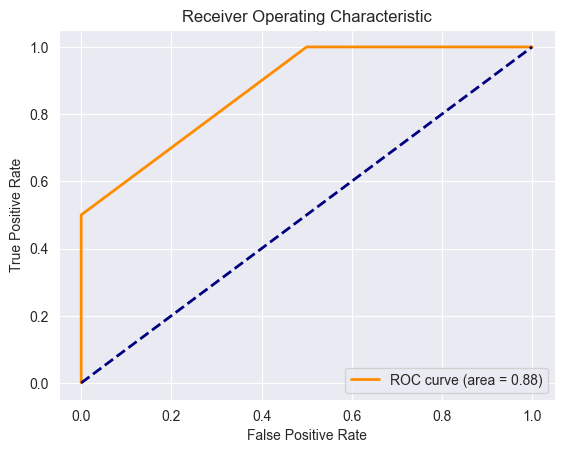

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from neural_network.DenseLayer import DenseLayer
from neural_network.Activation import Sigmoid, ReLU
from neural_network.NeuralNetwork import NeuralNetwork

# Generación de datos XOR
def generate_xor_data():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])
    return X, y

# Crear y entrenar la red neuronal
X, y = generate_xor_data()
network = NeuralNetwork(DenseLayer(2, 4), ReLU(), DenseLayer(4, 1), Sigmoid())
network.train(X, y, epochs=10000, learning_rate=0.1)

# Función para graficar la curva ROC
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Realizar predicciones y evaluar
predictions = network.predict(X)
predictions_rounded = np.round(predictions)

# Matriz de confusión y reporte de clasificación
print("Matriz de Confusión:")
print(confusion_matrix(y.flatten(), predictions_rounded.flatten()))
print("\nReporte de Clasificación:")
print(classification_report(y.flatten(), predictions_rounded.flatten()))

# Graficar la curva ROC
plot_roc_curve(y.flatten(), predictions.flatten())

# Datos MNIST

Epoch 0, Loss Train(MSE): 2.524838472993198, R2 Train: -0.017062228807567248
,Loss Valid(MSE): 2.672333790365825, R2 Valid: -0.03601223896068362
Epoch 1, Loss Train(MSE): 2.288095715160645, R2 Train: 0.003997013527534565
,Loss Valid(MSE): 2.310880466378037, R2 Valid: 0.0007444085709308323
Epoch 2, Loss Train(MSE): 2.252288756561062, R2 Train: 0.011587476776695582
,Loss Valid(MSE): 2.2798826479889973, R2 Valid: 0.003644218460859272
Epoch 3, Loss Train(MSE): 2.234804545652136, R2 Train: 0.01613428910765724
,Loss Valid(MSE): 2.2306831016122213, R2 Valid: 0.01729396476462408
Epoch 4, Loss Train(MSE): 2.2171480467916225, R2 Train: 0.01968097245200706
,Loss Valid(MSE): 2.24758980192722, R2 Valid: 0.010796246449303992
Epoch 5, Loss Train(MSE): 2.2041308191142175, R2 Train: 0.023930821305041095
,Loss Valid(MSE): 2.1967391669260095, R2 Valid: 0.026066407507383538
Epoch 6, Loss Train(MSE): 2.188263499029087, R2 Train: 0.026614714821341257
,Loss Valid(MSE): 2.2198474669375976, R2 Valid: 0.0168744

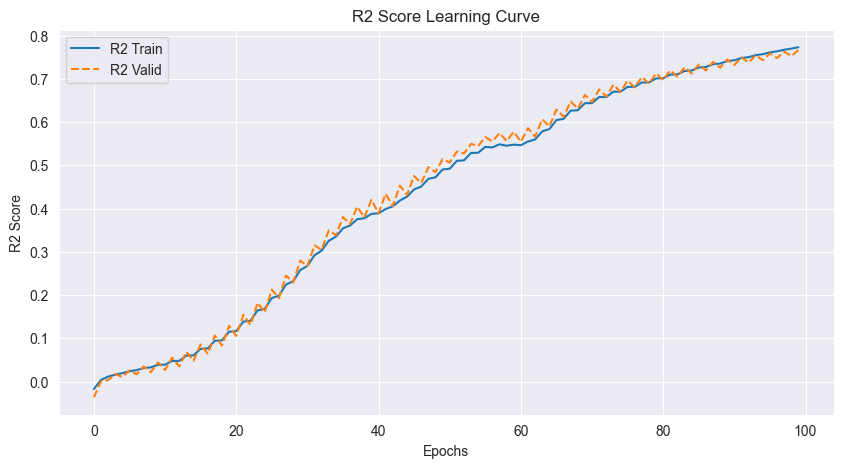

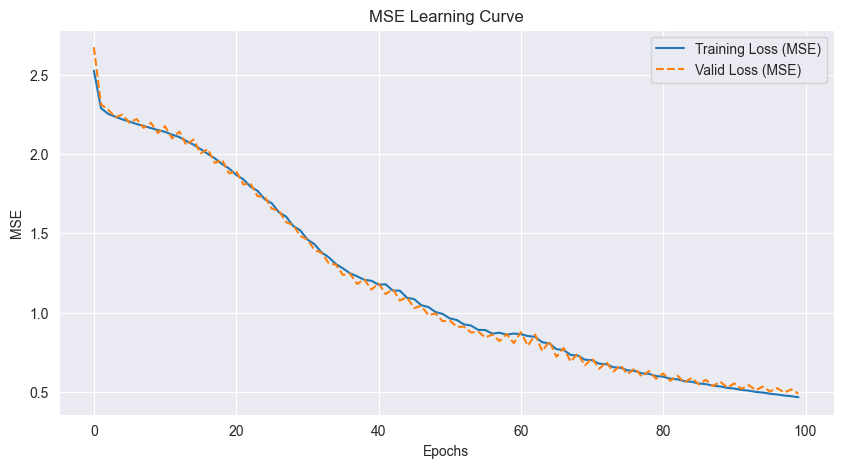

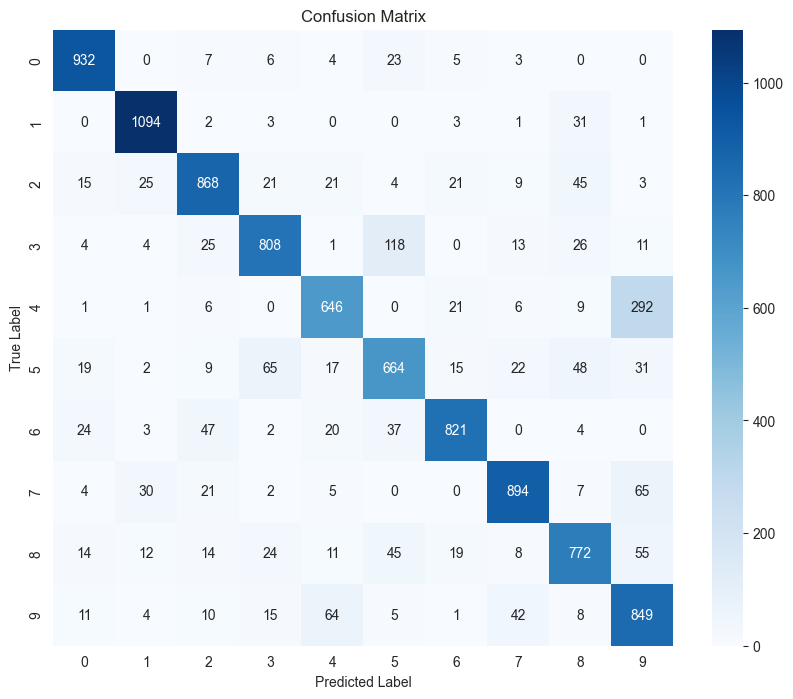

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       980
           1       0.93      0.96      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.85      0.80      0.83      1010
           4       0.82      0.66      0.73       982
           5       0.74      0.74      0.74       892
           6       0.91      0.86      0.88       958
           7       0.90      0.87      0.88      1028
           8       0.81      0.79      0.80       974
           9       0.65      0.84      0.73      1009

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.84     10000


In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from neural_network.DenseLayer import DenseLayer
from neural_network.Activation import ReLU, Softmax
from neural_network.NeuralNetwork import NeuralNetwork
from neural_network.LossFunctions import CrossEntropy
import seaborn as sns
import matplotlib.pyplot as plt

def load_mnist_data():
    train_data = pd.read_csv('mnist_train.csv')
    test_data = pd.read_csv('mnist_test.csv')
    return train_data, test_data

def prepare_data(data):
    data = data.dropna()
    y = data.iloc[:, 0].values
    X = data.iloc[:, 1:].values / 255.0
    y_one_hot = np.zeros((y.size, 10))
    y_one_hot[np.arange(y.size), y] = 1
    return X, y_one_hot

train_data, test_data = load_mnist_data()
X_train, y_train = prepare_data(train_data)
X_test, y_test = prepare_data(test_data)

network = NeuralNetwork(
        DenseLayer(784, 128),
        Sigmoid(),
        DenseLayer(128, 64),
        Sigmoid(),
        DenseLayer(64, 10),
        Softmax())

metrics = network.train(X_train, y_train, epochs=100, learning_rate=0.001, loss='crossentropy', patience = 100)

# Plot the learning curves for R2 Score
plt.figure(figsize=(10, 5))
plt.plot(metrics["r2_history_train"], label='R2 Train')
plt.plot(metrics["r2_history_valid"], label='R2 Valid', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score Learning Curve')
plt.legend()
plt.show()

# Plot the learning curves for MSE
plt.figure(figsize=(10, 5))
plt.plot(metrics["loss_history_train"], label='Training Loss (MSE)')
plt.plot(metrics["loss_history_valid"], label='Valid Loss (MSE)', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE Learning Curve')
plt.legend()
plt.show()

# Hacer predicciones y evaluar
predictions = network.predict(X_test)
predictions_rounded = np.argmax(predictions, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_labels, predictions_rounded)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test_labels, predictions_rounded))